In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
colors=['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B2', '#937860', '#64B5CD', '#CCB974','#F08080']

In [2]:
df = pd.read_csv(r"/content/food_orders_new_delhi (1).csv")

In [3]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [4]:
df.shape

(1000, 12)

In [5]:
df.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [7]:
# repalcing null value with No Discount.
df['Discounts and Offers']=df['Discounts and Offers'].fillna('No discount')

In [8]:
df["Order Date and Time"] = pd.to_datetime(df["Order Date and Time"])
df["Delivery Date and Time"] = pd.to_datetime(df["Delivery Date and Time"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    1000 non-null   object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

In [10]:
# funtion to calculate time of day based on hour
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    elif 20 <= hour < 24:
        return 'Night'
    else:
        return 'Midnight Craving'

df['order_date']=df['Order Date and Time'].dt.date # extract the date from Order Date and Time
df['order_day']=df['Order Date and Time'].dt.day_name() # extract the name of the days from Order Date and Time
df['order_time']=df['Order Date and Time'].dt.hour.apply(categorize_time) # extract the hour from Order Date and Time

In [11]:
df['order_time'].value_counts(dropna=False)

order_time
Morning             315
Midnight Craving    198
Evening             178
Night               163
Afternoon           146
Name: count, dtype: int64

In [12]:
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,order_date,order_day,order_time
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,2024-02-01,Thursday,Midnight Craving
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,2024-02-02,Friday,Night
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,2024-01-31,Wednesday,Morning
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,No discount,146,27,0,2024-01-16,Tuesday,Night
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,2024-01-29,Monday,Midnight Craving
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,2024-01-14,Sunday,Morning
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,No discount,110,42,0,2024-01-28,Sunday,Morning
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,No discount,64,31,0,2024-01-21,Sunday,Morning
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0,2024-01-30,Tuesday,Night


In [13]:
df["Discounts and Offers"].sample(10)

679    15% New User
629       5% on App
452     No discount
298             10%
225    50 off Promo
698       5% on App
672             10%
695       5% on App
711             10%
703    50 off Promo
Name: Discounts and Offers, dtype: object

In [14]:
# this confirms all the discounts are in percentage

In [15]:
# first, let's create a function to extract numeric values from the 'Discounts and Offers' string
def extract_discount(discount_str):
    if 'off' in discount_str:
        # Fixed amount off
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        # Percentage off
        return float(discount_str.split('%')[0])
    else:
        # No discount
        return 0.0

In [16]:
# apply the function to create a new 'Discount Value' column
df['Discount Percentage'] = df['Discounts and Offers'].apply(lambda x: extract_discount(x))

In [17]:
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,order_date,order_day,order_time,Discount Percentage
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,2024-02-01,Thursday,Midnight Craving,5.0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,2024-02-02,Friday,Night,10.0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,2024-01-31,Wednesday,Morning,15.0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,No discount,146,27,0,2024-01-16,Tuesday,Night,0.0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,2024-01-29,Monday,Midnight Craving,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,2024-01-14,Sunday,Morning,5.0
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,No discount,110,42,0,2024-01-28,Sunday,Morning,0.0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,No discount,64,31,0,2024-01-21,Sunday,Morning,0.0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0,2024-01-30,Tuesday,Night,15.0


In [18]:
# for percentage discounts, calculate the discount amount based on the order value
df['Discount Amount'] = df.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                   if x['Discount Percentage'] > 1
                                                   else x['Discount Percentage'], axis=1)

# adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column
df['Discount Amount'] = df.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                                   else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)

In [19]:
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,order_date,order_day,order_time,Discount Percentage,Discount Amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,2024-02-01,Thursday,Midnight Craving,5.0,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,2024-02-02,Friday,Night,10.0,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,2024-01-31,Wednesday,Morning,15.0,140.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,No discount,146,27,0,2024-01-16,Tuesday,Night,0.0,0.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,2024-01-29,Monday,Midnight Craving,50.0,996.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,2024-01-14,Sunday,Morning,5.0,41.25
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,No discount,110,42,0,2024-01-28,Sunday,Morning,0.0,0.00
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,No discount,64,31,0,2024-01-21,Sunday,Morning,0.0,0.00
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0,2024-01-30,Tuesday,Night,15.0,212.10


In [20]:
df["Total Cost"] = df["Delivery Fee"] + df["Payment Processing Fee"] + df ["Discount Amount"]
df["Revenue"] = df["Commission Fee"]
df["Profit"] =  df["Revenue"]-df["Total Cost"]

In [21]:
# Crating a column for calculating the percentage of commission based on order values

df['commission_percentage'] = (df['Commission Fee']/df['Order Value'])*100

In [22]:
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,...,Refunds/Chargebacks,order_date,order_day,order_time,Discount Percentage,Discount Amount,Total Cost,Revenue,Profit,commission_percentage
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,...,0,2024-02-01,Thursday,Midnight Craving,5.0,95.70,142.70,150,7.30,7.836991
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,...,0,2024-02-02,Friday,Night,10.0,98.60,161.60,198,36.40,20.081136
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,...,0,2024-01-31,Wednesday,Morning,15.0,140.55,215.55,195,-20.55,20.811099
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,No discount,146,...,0,2024-01-16,Tuesday,Night,0.0,0.00,77.00,146,69.00,9.979494
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,...,0,2024-01-29,Monday,Midnight Craving,50.0,996.00,1076.00,130,-946.00,6.526104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,...,50,2024-01-14,Sunday,Morning,5.0,41.25,88.25,165,76.75,20.000000
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,No discount,110,...,0,2024-01-28,Sunday,Morning,0.0,0.00,92.00,110,18.00,6.760910
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,No discount,64,...,0,2024-01-21,Sunday,Morning,0.0,0.00,51.00,64,13.00,11.573237
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,...,0,2024-01-30,Tuesday,Night,15.0,212.10,246.10,199,-47.10,14.073550


In [23]:
df["Payment Method"].value_counts()

Payment Method
Cash on Delivery    357
Credit Card         337
Digital Wallet      306
Name: count, dtype: int64

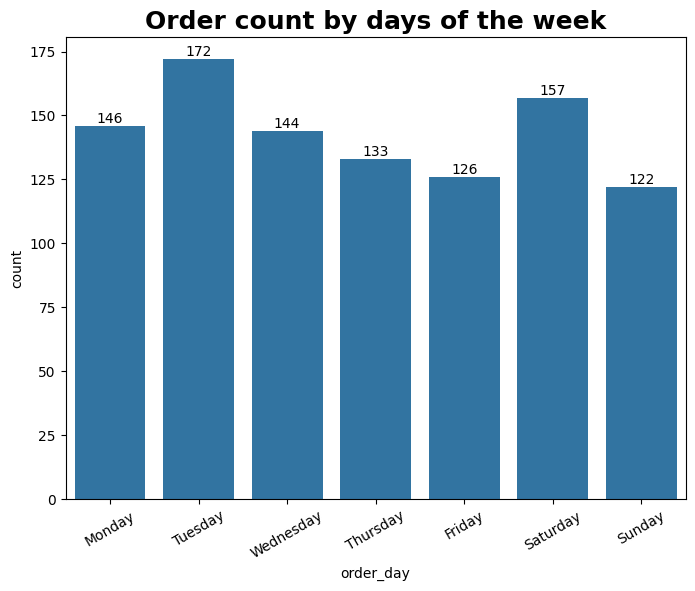

In [24]:
plt.figure(figsize=(8, 6))
ax1 = sns.countplot(data=df,x='order_day',order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Order count by days of the week',fontsize = 18,fontweight='bold')
plt.xticks(rotation = 30)
# annotation
ax1.bar_label(ax1.containers[0], fmt='%d', label_type="edge", color="black")
plt.show()

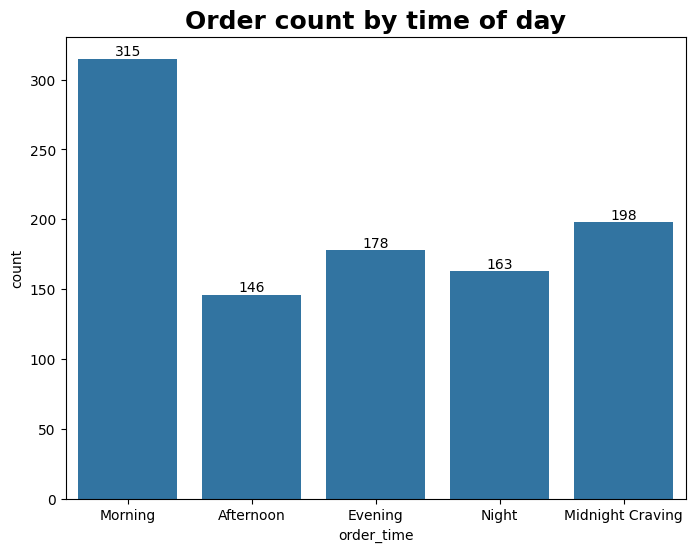

In [25]:
plt.figure(figsize=(8, 6))
ax2 = sns.countplot(data=df,x='order_time',order=['Morning', 'Afternoon', 'Evening','Night','Midnight Craving'])
plt.title('Order count by time of day',fontsize = 18,fontweight='bold')
# annotation
ax2.bar_label(ax2.containers[0], fmt='%d', label_type="edge", color="black")

plt.show()

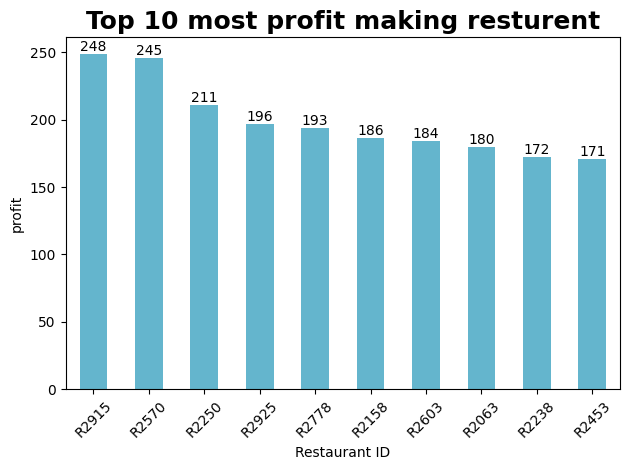

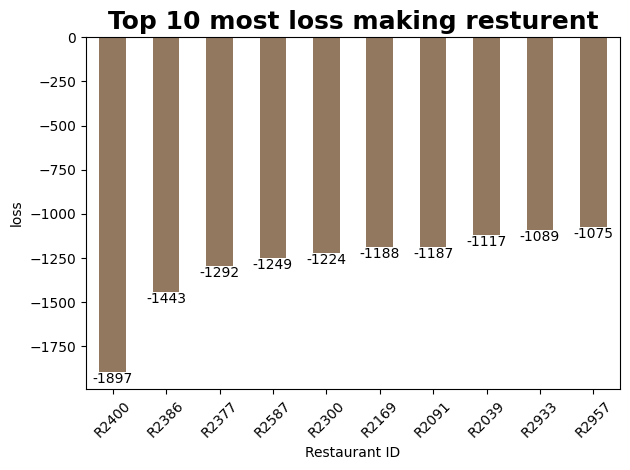

In [26]:
# list of top 10 restaurants based on profit and loss

ax3 = df.groupby('Restaurant ID')['Profit'].sum().nlargest(10).plot(kind='bar',color=random.choice(colors))
plt.title('Top 10 most profit making resturent',fontsize = 18,fontweight='bold')
ax3.bar_label(ax3.containers[0], fmt='%d', label_type="edge", color="black")
plt.ylabel('profit')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

ax4 = df.groupby('Restaurant ID')['Profit'].sum().nsmallest(10).plot(kind='bar',color=random.choice(colors))
plt.title('Top 10 most loss making resturent',fontsize = 18,fontweight='bold')
ax4.bar_label(ax4.containers[0], fmt='%d', label_type="edge", color="black")
plt.ylabel('loss')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [27]:
df.head(2)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,...,Refunds/Chargebacks,order_date,order_day,order_time,Discount Percentage,Discount Amount,Total Cost,Revenue,Profit,commission_percentage
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,...,0,2024-02-01,Thursday,Midnight Craving,5.0,95.7,142.7,150,7.3,7.836991
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,...,0,2024-02-02,Friday,Night,10.0,98.6,161.6,198,36.4,20.081136


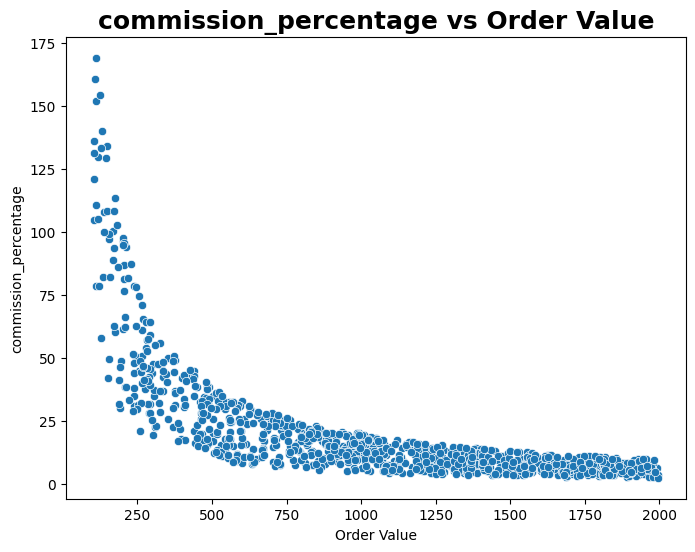

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Order Value',y='commission_percentage',data=df)
plt.title('commission_percentage vs Order Value',fontsize = 18,fontweight='bold')

plt.show()


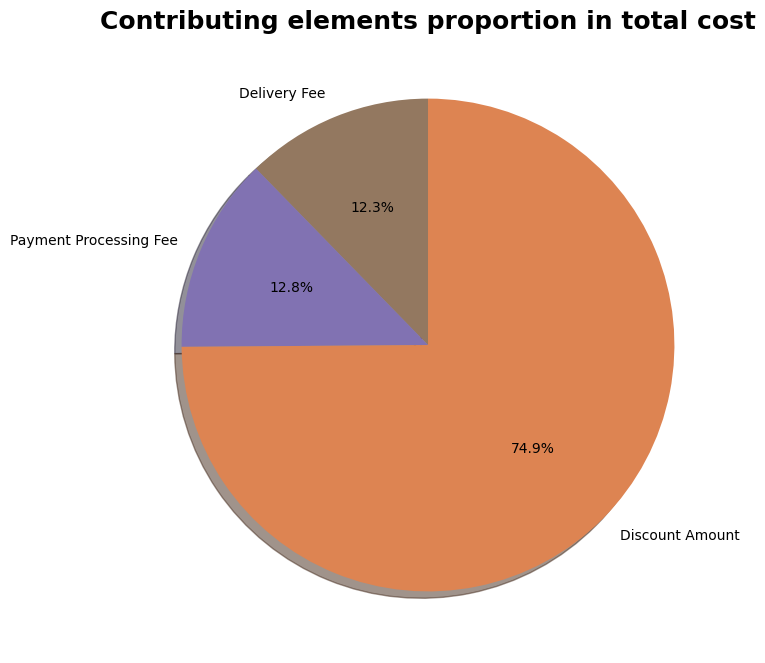

In [29]:
cost_distribution = df[['Delivery Fee','Payment Processing Fee','Discount Amount']].sum()
plt.figure(figsize=(10,8))
plt.pie(x=cost_distribution,labels=cost_distribution.index,colors=random.sample(colors,len(cost_distribution)),autopct='%1.1f%%',
        shadow = True,startangle=90)
plt.title('Contributing elements proportion in total cost',fontsize = 18,fontweight='bold')
plt.show()

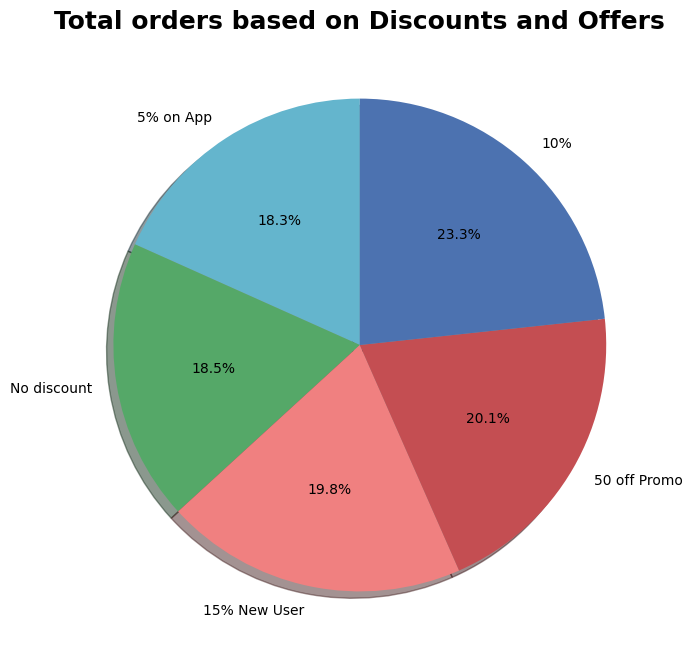

In [30]:
# replacing the null value with no offers
df['Discounts and Offers']=df['Discounts and Offers'].fillna('No offers')

orders = df.groupby('Discounts and Offers')['Order ID'].count().sort_values()
plt.figure(figsize=(10,8))
plt.pie(x=orders,labels=orders.index,autopct='%1.1f%%',colors=random.sample(colors,len(orders)),
        shadow = True,startangle=90)
plt.title('Total orders based on Discounts and Offers',fontsize = 18,fontweight='bold')
plt.show()

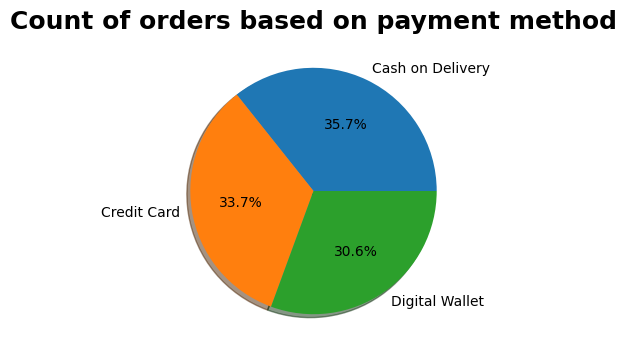

In [31]:
payment_method=df['Payment Method'].value_counts()
plt.figure(figsize=(10,4))
plt.pie(x=payment_method,labels=payment_method.index,autopct='%1.1f%%',shadow=True)
plt.title('Count of orders based on payment method',fontsize = 18,fontweight='bold')
plt.show()

In [32]:
df[["Discount Amount","Commission Fee","Discount Percentage", "Order Value"]].mean()

Discount Amount         174.25785
Commission Fee          126.99000
Discount Percentage      16.26500
Order Value            1053.96900
dtype: float64

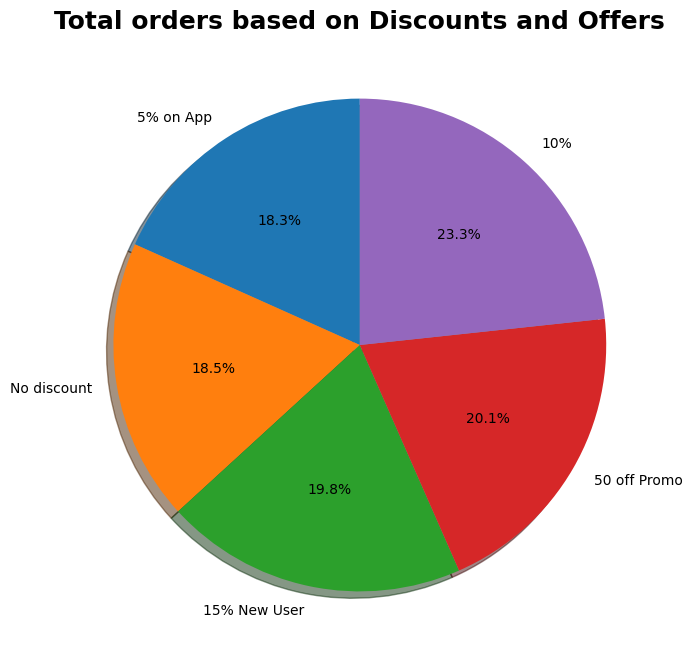

In [33]:
# replacing the null value with no offers
df['Discounts and Offers']=df['Discounts and Offers'].fillna('No offers')

orders = df.groupby('Discounts and Offers')["Order ID"].count().sort_values()
plt.figure(figsize=(10,8))
plt.pie(x=orders,labels=orders.index,autopct='%1.1f%%',
        shadow = True,startangle=90)
plt.title('Total orders based on Discounts and Offers',fontsize = 18,fontweight='bold')
plt.show()

In [34]:
df.groupby("Payment Method")["Discount Amount"].mean()

Payment Method
Cash on Delivery    170.775350
Credit Card         179.454006
Digital Wallet      172.598203
Name: Discount Amount, dtype: float64

In [35]:
# aggregate data to get overall metrics
total_orders = df.shape[0]
total_revenue = df['Revenue'].sum()
total_costs = df['Total Cost'].sum()
total_profit = df['Profit'].sum()
average_profit = round(total_profit/total_orders)

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Profit": total_profit,
    "Average Profit": average_profit
}

print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 232709.85, 'Total Profit': -105719.85, 'Average Profit': -106}


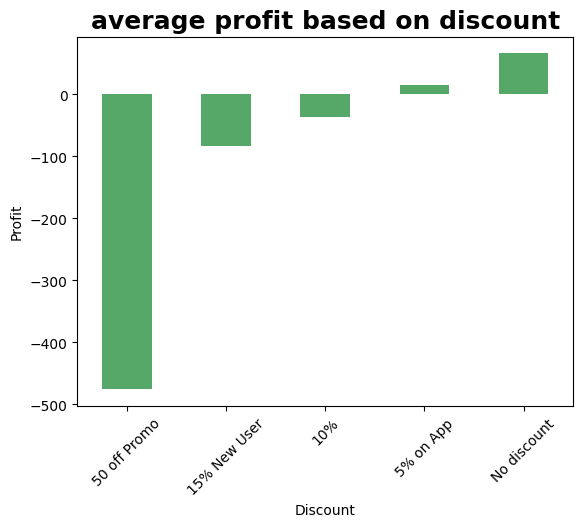

In [36]:
avg_profit = df.groupby('Discounts and Offers')['Profit'].mean().sort_values()
avg_profit.plot(kind='bar',color=random.choice(colors))
plt.title('average profit based on discount',fontsize = 18,fontweight='bold')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.xticks(rotation = 45)
plt.show()

In [37]:
df

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,...,Refunds/Chargebacks,order_date,order_day,order_time,Discount Percentage,Discount Amount,Total Cost,Revenue,Profit,commission_percentage
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,...,0,2024-02-01,Thursday,Midnight Craving,5.0,95.70,142.70,150,7.30,7.836991
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,...,0,2024-02-02,Friday,Night,10.0,98.60,161.60,198,36.40,20.081136
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,...,0,2024-01-31,Wednesday,Morning,15.0,140.55,215.55,195,-20.55,20.811099
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,No discount,146,...,0,2024-01-16,Tuesday,Night,0.0,0.00,77.00,146,69.00,9.979494
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,...,0,2024-01-29,Monday,Midnight Craving,50.0,996.00,1076.00,130,-946.00,6.526104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,...,50,2024-01-14,Sunday,Morning,5.0,41.25,88.25,165,76.75,20.000000
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,No discount,110,...,0,2024-01-28,Sunday,Morning,0.0,0.00,92.00,110,18.00,6.760910
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,No discount,64,...,0,2024-01-21,Sunday,Morning,0.0,0.00,51.00,64,13.00,11.573237
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,...,0,2024-01-30,Tuesday,Night,15.0,212.10,246.10,199,-47.10,14.073550


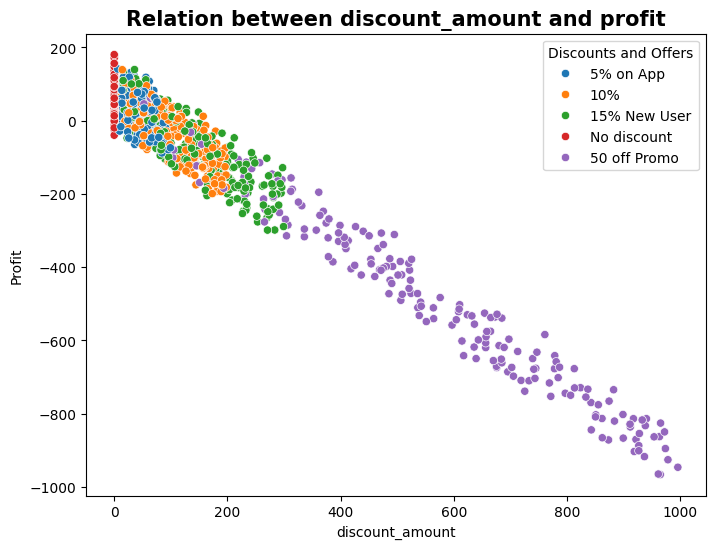

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Discount Amount',y='Profit',data=df,hue='Discounts and Offers')
plt.title('Relation between discount_amount and profit',fontsize = 15,fontweight='bold')
plt.ylabel('Profit')
plt.xlabel('discount_amount')
plt.show()

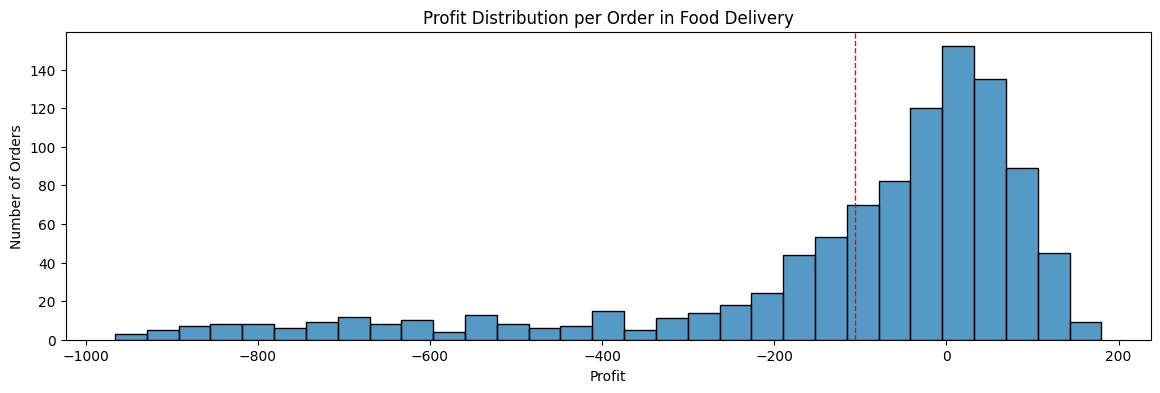

In [39]:
# distribution of profitable and unprofitable orders.
plt.figure(figsize=(14,4))
sns.histplot(df["Profit"])
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(round(df['Profit'].mean()), color='red',linestyle='dashed', linewidth=1)
plt.show()

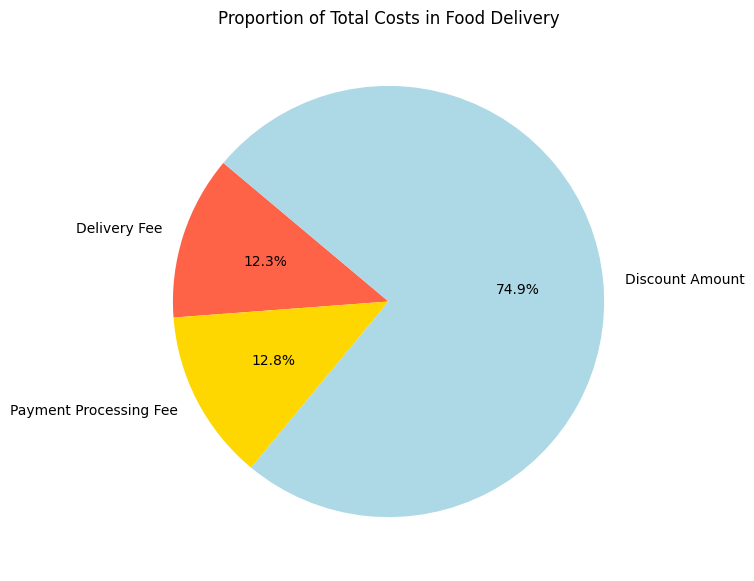

In [40]:
# Proportion of total costs (delivery fees, payment processing fees, and discounts).
# pie chart for the proportion of total costs
costs_breakdown = df[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

In [41]:
# Pie chart suggest that promotional strategies might be heavily impacting overall profitability.

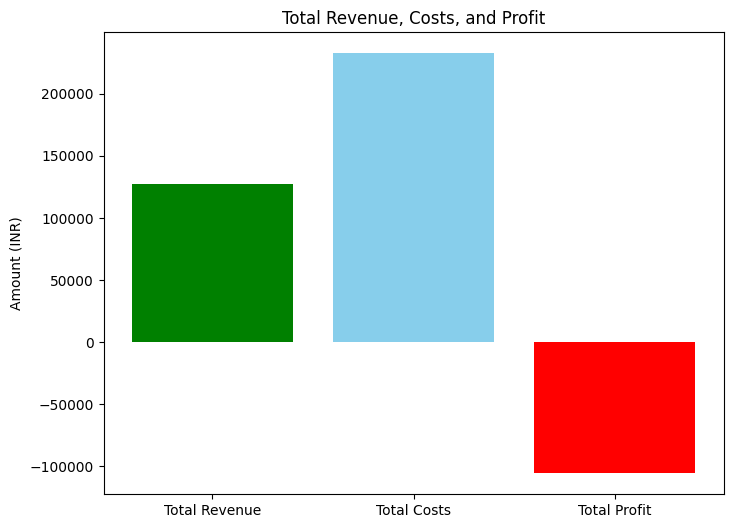

In [42]:
# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['green', 'skyblue', 'red'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

In [43]:
# From the analysis its clearly visible that promotions offer/Discount is the major driving factor for losses.

In [44]:
# filter the dataset for profitable orders
profitable_orders = df[df['Profit'] > 0]

# calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

# calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# calculate the new averages
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(f"New_avg_commission%: {new_avg_commission_percentage}, New_avg_discount%: {new_avg_discount_percentage}")

New_avg_commission%: 30.508436145149435, New_avg_discount%: 5.867469879518072


<ipython-input-44-4e8eaf5be91d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100
<ipython-input-44-4e8eaf5be91d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100


In [45]:
profitable_orders

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,...,order_day,order_time,Discount Percentage,Discount Amount,Total Cost,Revenue,Profit,commission_percentage,Commission Percentage,Effective Discount Percentage
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,...,Thursday,Midnight Craving,5.0,95.70,142.70,150,7.30,7.836991,7.836991,5.0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,...,Friday,Night,10.0,98.60,161.60,198,36.40,20.081136,20.081136,10.0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,No discount,146,...,Tuesday,Night,0.0,0.00,77.00,146,69.00,9.979494,9.979494,0.0
5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,...,Thursday,Midnight Craving,10.0,43.90,90.90,92,1.10,20.956720,20.956720,10.0
6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,...,Friday,Night,5.0,15.15,57.15,144,86.85,47.524752,47.524752,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,989,C8311,R2380,2024-01-31 06:48:21,2024-01-31 08:43:21,1511,0,Credit Card,5% on App,136,...,Wednesday,Morning,5.0,75.55,85.55,136,50.45,9.000662,9.000662,5.0
989,990,C8186,R2622,2024-01-09 17:54:38,2024-01-09 18:42:38,1058,50,Credit Card,5% on App,182,...,Tuesday,Evening,5.0,52.90,147.90,182,34.10,17.202268,17.202268,5.0
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,...,Sunday,Morning,5.0,41.25,88.25,165,76.75,20.000000,20.000000,5.0
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,No discount,110,...,Sunday,Morning,0.0,0.00,92.00,110,18.00,6.760910,6.760910,0.0


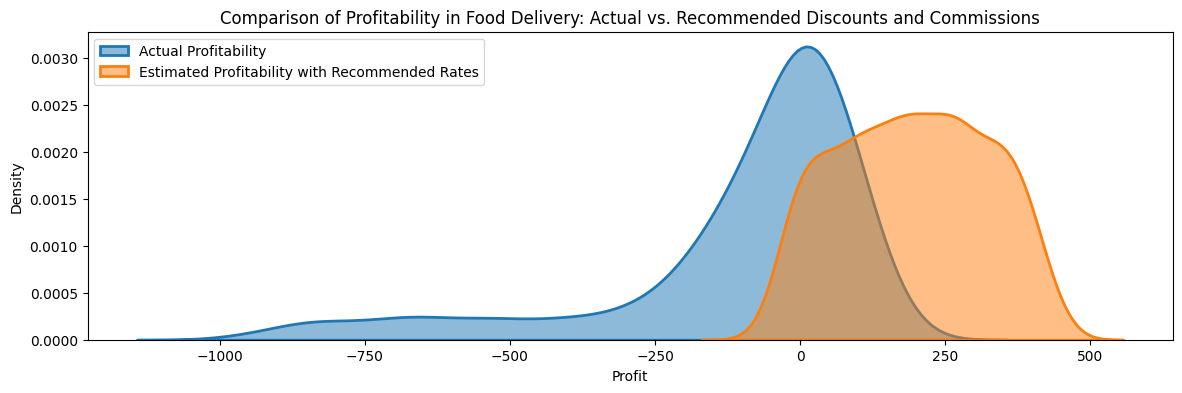

In [46]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 30.0  # 30%
recommended_discount_percentage = 6.0    # 6%

# calculate the simulated commission fee and discount amount using recommended percentages
df['Simulated Commission Fee'] = df['Order Value'] * (recommended_commission_percentage / 100)
df['Simulated Discount Amount'] = df['Order Value'] * (recommended_discount_percentage / 100)

# recalculate total costs and profit with simulated values
df['Simulated Total Costs'] = (df['Delivery Fee'] +
                                        df['Payment Processing Fee'] +
                                        df['Simulated Discount Amount'])

df['Simulated Profit'] = (df['Simulated Commission Fee'] -
                                   df['Simulated Total Costs'])

# visualizing the comparison
import seaborn as sns

plt.figure(figsize=(14, 4))

# actual profitability
sns.kdeplot(df['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(df['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

In [47]:
profitable_orders[["Discount Amount","Commission Fee","Discount Percentage", "Order Value"]].mean()

Discount Amount         32.156265
Commission Fee         144.481928
Discount Percentage      5.867470
Order Value            840.096386
dtype: float64